# Catboost Tutorial Video
https://www.youtube.com/watch?v=usdEWSDisS0

In [3]:
import os
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
import catboost 
print('setup complete')

setup complete


In [6]:
from catboost.datasets import amazon

(train_df, test_df)= amazon()

In [12]:
train_df.head()
#test_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Exploring the Data

In [19]:
# label values extraction
y=train_df.ACTION
X=train_df.drop('ACTION', axis=1)

#y.head()
#x.head()

In [22]:
# Declare catagorical features
cat_features=list(range(0,X.shape[1]))
print(cat_features)

# all of our labels are catagorical

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [23]:
#looking at label balance
print('labels: {}'.format(set(y)))
print('zero count = {}, one count = {}'.format(len(y)-sum(y), sum(y)))

# there are two counts, and there are many more 1's thab 0's

labels: {0, 1}
zero count = 1897, one count = 30872


# Training First Model

In [25]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(iterations=100)
model.fit(X,y,cat_features=cat_features, verbose=10 #tells how many iterations to print
         )

Learning rate set to 0.377604
0:	learn: 0.4528598	total: 10.2ms	remaining: 1.01s
10:	learn: 0.1744186	total: 91.9ms	remaining: 743ms
20:	learn: 0.1676119	total: 183ms	remaining: 688ms
30:	learn: 0.1652446	total: 280ms	remaining: 622ms
40:	learn: 0.1633644	total: 372ms	remaining: 536ms
50:	learn: 0.1621892	total: 462ms	remaining: 444ms
60:	learn: 0.1609164	total: 563ms	remaining: 360ms
70:	learn: 0.1594572	total: 650ms	remaining: 266ms
80:	learn: 0.1585876	total: 741ms	remaining: 174ms
90:	learn: 0.1573593	total: 852ms	remaining: 84.3ms
99:	learn: 0.1566977	total: 950ms	remaining: 0us


In [21]:
model.predict_proba(X)
# 1st num - probability of calss=0
# 2nd num - probability of calss=1

array([[0.0098, 0.9902],
       [0.0101, 0.9899],
       [0.0579, 0.9421],
       ...,
       [0.0118, 0.9882],
       [0.1891, 0.8109],
       [0.0235, 0.9765]])

# Working with Datasets

In [31]:
from catboost import Pool
pool = Pool(data=X, label=y, cat_features=cat_features)

# Spllit into train & validate

In [34]:
from sklearn.model_selection import train_test_split

data= train_test_split(X,y, test_size=0.2, random_state=0)

#### The order of this matters###
X_train,  X_validation, y_train, y_validation= data

train_pool = Pool(
    data = X_train,
    label = y_train,
    cat_features = cat_features
)

validation_pool = Pool(
    data = X_validation,
    label = y_validation,
    cat_features = cat_features
)

# Selecting objective function

for probabilities in target - crossentropy:

for binary target - logloss

In [37]:
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    #loss_function='CrossEntropy'
)
model.fit(train_pool, eval_set=validation_pool, verbose=False)

print('Model is fitted: {}'.format(model.is_fitted()))
print('Model params;\n{}'.format(model.get_params()))


Model is fitted: True
Model params;
{'iterations': 5, 'learning_rate': 0.1}


In [ ]:
# Standard Output

In [41]:
model = CatBoostClassifier(
    iterations=100,
    verbose=10,
)
model.fit(train_pool, eval_set=validation_pool);

#gives the train and test validation error

Learning rate set to 0.193326
0:	learn: 0.5566769	test: 0.5563281	best: 0.5563281 (0)	total: 15ms	remaining: 1.49s
10:	learn: 0.2178466	test: 0.2133204	best: 0.2133204 (10)	total: 96.3ms	remaining: 779ms
20:	learn: 0.1814093	test: 0.1725174	best: 0.1725174 (20)	total: 169ms	remaining: 634ms
30:	learn: 0.1747026	test: 0.1623252	best: 0.1623252 (30)	total: 251ms	remaining: 560ms
40:	learn: 0.1730095	test: 0.1605745	best: 0.1605745 (40)	total: 323ms	remaining: 464ms
50:	learn: 0.1712531	test: 0.1592140	best: 0.1592140 (50)	total: 398ms	remaining: 382ms
60:	learn: 0.1699903	test: 0.1583589	best: 0.1583589 (60)	total: 481ms	remaining: 308ms
70:	learn: 0.1696087	test: 0.1582369	best: 0.1582042 (66)	total: 563ms	remaining: 230ms
80:	learn: 0.1681471	test: 0.1573081	best: 0.1573081 (80)	total: 642ms	remaining: 151ms
90:	learn: 0.1673316	test: 0.1575898	best: 0.1573067 (81)	total: 723ms	remaining: 71.5ms
99:	learn: 0.1668035	test: 0.1574311	best: 0.1573067 (81)	total: 796ms	remaining: 0us

best

# Metrics calculation and graph plotting

In [42]:
model = CatBoostClassifier(
    iterations=50,
    learning_rate=0.5,
    custom_loss=['AUC','Accuracy']
    )

model.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Model Comparision

In [43]:
model1 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.7,
    train_dir='learning_rate_0.7'
    )

model2 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.01,
    train_dir='learning_rate_0.01'
    )

model1.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=20,
)

model2.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=20,
)


0:	learn: 0.3264513	test: 0.3248170	best: 0.3248170 (0)	total: 19.2ms	remaining: 1.9s
20:	learn: 0.1688825	test: 0.1574182	best: 0.1573949 (16)	total: 180ms	remaining: 676ms
40:	learn: 0.1632884	test: 0.1582531	best: 0.1571533 (23)	total: 335ms	remaining: 481ms
60:	learn: 0.1584388	test: 0.1573279	best: 0.1569712 (52)	total: 471ms	remaining: 301ms
80:	learn: 0.1544282	test: 0.1583794	best: 0.1569712 (52)	total: 624ms	remaining: 146ms
99:	learn: 0.1510415	test: 0.1583995	best: 0.1569712 (52)	total: 767ms	remaining: 0us

bestTest = 0.1569712214
bestIteration = 52

Shrink model to first 53 iterations.
0:	learn: 0.6853769	test: 0.6853610	best: 0.6853610 (0)	total: 10.5ms	remaining: 1.03s
20:	learn: 0.5575578	test: 0.5568257	best: 0.5568257 (20)	total: 133ms	remaining: 500ms
40:	learn: 0.4678112	test: 0.4663769	best: 0.4663769 (40)	total: 260ms	remaining: 374ms
60:	learn: 0.4029225	test: 0.4011544	best: 0.4011544 (60)	total: 368ms	remaining: 236ms
80:	learn: 0.3551621	test: 0.3530433	best: 

In [45]:
from catboost import MetricVisualizer
MetricVisualizer(['learning_rate_0.7','learning_rate_0.01']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Best Iteration

In [47]:
model = CatBoostClassifier(
    iterations=100,
    #use_best_model=False
)

model.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Cross Validation

In [49]:
from catboost import cv

params={
    'loss_function':'Logloss',
    'iterations':80,
    'custom_loss':'AUC',
    'learning_rate':0.5,

}

cv_data=cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.300473,0.000409,0.302596,0.000409,0.553022,0.012227
1,1,0.234988,0.000737,0.235882,0.000321,0.569910,0.021923
2,2,0.195387,0.002496,0.201465,0.001357,0.780770,0.018157
3,3,0.182409,0.001881,0.190626,0.000809,0.805650,0.004481
4,4,0.174984,0.002109,0.184246,0.000440,0.817458,0.003748


In [51]:
best_value=np.min(cv_data['test-Logloss-mean'])
best_iter=np.argmin(cv_data['test-Logloss-mean'])

print('Best validation Logloss score, not stratisfied:{:.4f}±{:.4f} on step {}'.format(
    best_value,
cv_data['test-Logloss-std'][best_iter], best_iter
))

Best validation Logloss score, not stratisfied:0.1636±0.0040 on step 38


In [52]:
# no stratification
from catboost import cv

params={
    'loss_function':'Logloss',
    'iterations':80,
    'custom_loss':'AUC',
    'learning_rate':0.5,

}

cv_data=cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    verbose=False, 
    stratified=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# SKlearn Gridsearch – param tuninng


In [55]:
#runs training with diff params and selcts the one were validation error was best
from sklearn.model_selection import GridSearchCV


param_grid = {
    "learning_rate": [0.001,0.01,0.5],
    #can be more 
             }

clf = CatBoostClassifier(
    iterations=20,
    cat_features=cat_features,
    verbose=20
)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
results = grid_search.fit(X_train, y_train)
results.best_estimator_.get_params()

0:	learn: 0.6923673	total: 6.64ms	remaining: 126ms
19:	learn: 0.6778431	total: 85.9ms	remaining: 0us
0:	learn: 0.6923682	total: 6.54ms	remaining: 124ms
19:	learn: 0.6778558	total: 77.9ms	remaining: 0us
0:	learn: 0.6923682	total: 6.33ms	remaining: 120ms
19:	learn: 0.6778568	total: 79.1ms	remaining: 0us
0:	learn: 0.6853838	total: 7.14ms	remaining: 136ms
19:	learn: 0.5629769	total: 81.6ms	remaining: 0us
0:	learn: 0.6853928	total: 6.78ms	remaining: 129ms
19:	learn: 0.5630657	total: 82.5ms	remaining: 0us
0:	learn: 0.6853925	total: 6.56ms	remaining: 125ms
19:	learn: 0.5630556	total: 91.1ms	remaining: 0us
0:	learn: 0.3972934	total: 8.05ms	remaining: 153ms
19:	learn: 0.1766459	total: 135ms	remaining: 0us
0:	learn: 0.3977266	total: 8.37ms	remaining: 159ms
19:	learn: 0.1774892	total: 145ms	remaining: 0us
0:	learn: 0.3977128	total: 8.73ms	remaining: 166ms
19:	learn: 0.1733642	total: 150ms	remaining: 0us
0:	learn: 0.3971379	total: 10.6ms	remaining: 201ms
19:	learn: 0.1717590	total: 179ms	remaining

{'iterations': 20,
 'learning_rate': 0.5,
 'verbose': 20,
 'cat_features': [0, 1, 2, 3, 4, 5, 6, 7, 8]}

# Early stop for overfit

In [56]:
#algorithm will set learning rate by self too

model_with_early_stop = CatBoostClassifier(
    iterations=200,
    learning_rate=0.5,
    early_stopping_rounds=20
    #use_best_model=False
)

model_with_early_stop.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Early stop w/ eval metric

to optimize other metric besides Logloss

In [57]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC',
    iterations=200,
    learning_rate=0.5,
    early_stopping_rounds=20
    #use_best_model=False
)

model_with_early_stop.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
print(model_with_early_stop.tree_count_)

47


# Model Predictions

In [60]:
model = CatBoostClassifier(iterations = 200, learning_rate=0.03)
model.fit(train_pool, verbose=50);

0:	learn: 0.6569432	total: 38.1ms	remaining: 7.57s
50:	learn: 0.1951547	total: 894ms	remaining: 2.61s
100:	learn: 0.1664996	total: 1.94s	remaining: 1.9s
150:	learn: 0.1595258	total: 3.39s	remaining: 1.1s
199:	learn: 0.1558475	total: 4.85s	remaining: 0us


In [61]:
#just based on rounding

print(model.predict(X_validation))

[1 1 1 ... 1 1 1]


In [62]:
print(model.predict_proba(X_validation))

[[0.0313 0.9687]
 [0.0221 0.9779]
 [0.0109 0.9891]
 ...
 [0.0426 0.9574]
 [0.0275 0.9725]
 [0.0192 0.9808]]


In [64]:
raw_pred=model.predict(
    X_validation,
    prediction_type='RawFormulaVal'
)

print(raw_pred)

[3.4309 3.788  4.5062 ... 3.1133 3.5647 3.9341]


In [65]:
from numpy import exp

sigmoid = lambda x: 1/(1+exp(-x))

probabilities = sigmoid(raw_pred)

print(probabilities)

[0.9687 0.9779 0.9891 ... 0.9574 0.9725 0.9808]


In [66]:
import matplotlib.pyplot as plt
from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model, validation_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)


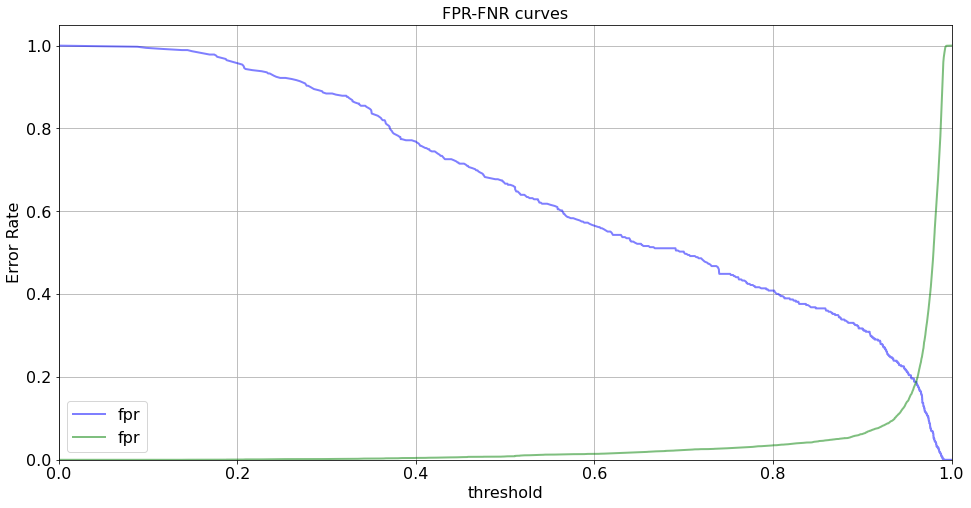

In [70]:
plt.figure(figsize=(16,8))
style = {'alpha':0.5, 'lw':2}

plt.plot(thresholds, fpr, color='blue', label='fpr', **style)
plt.plot(thresholds, fnr, color='green', label='fpr', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=16)
plt.legend(loc="lower left", fontsize=16)

In [71]:
#will tell you thresholds for the "Predict" function
from catboost.utils import select_threshold

print(select_threshold(model, validation_pool, FNR=0.01))
print(select_threshold(model, validation_pool, FPR=0.01))

0.5165367985887064
0.9886729205587221


# Metric Eval on a new dataset

In [72]:
metrics = model.eval_metrics(
    data=validation_pool,
    metrics = ['Logloss', 'AUC'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1, 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [73]:
print('AUC values:\n{}'.format(np.array(metrics['AUC'])))


AUC values:
[0.5509 0.6273 0.6273 0.6279 0.6264 0.6262 0.6579 0.6579 0.6569 0.6568
 0.6567 0.6567 0.6556 0.6556 0.6556 0.6557 0.6558 0.6575 0.6587 0.6585
 0.6588 0.6587 0.7038 0.7038 0.7131 0.7263 0.7383 0.7463 0.7495 0.7655
 0.7657 0.7671 0.786  0.794  0.8025 0.8038 0.8053 0.8056 0.8125 0.8162
 0.8257 0.8275 0.829  0.8298 0.8341 0.8348 0.8357 0.8372 0.8394 0.8398
 0.841  0.8415 0.8415 0.8426 0.8426 0.8432 0.8438 0.8441 0.8445 0.846
 0.8464 0.8465 0.8469 0.8481 0.8487 0.8493 0.8498 0.8503 0.8504 0.8504
 0.8501 0.8511 0.8519 0.8522 0.8522 0.8521 0.852  0.8521 0.8522 0.8525
 0.855  0.8567 0.8592 0.8615 0.8633 0.8647 0.8659 0.8682 0.8705 0.8729
 0.8749 0.8765 0.878  0.8793 0.8802 0.8805 0.8816 0.8827 0.8829 0.8837
 0.8844 0.8848 0.8856 0.8857 0.8863 0.8872 0.8874 0.8878 0.8882 0.8885
 0.8886 0.8891 0.8894 0.8896 0.8897 0.8898 0.8901 0.8905 0.8907 0.891
 0.8914 0.8916 0.8917 0.892  0.8922 0.8923 0.8924 0.8926 0.8927 0.8929
 0.8929 0.893  0.893  0.8933 0.8934 0.8937 0.8935 0.8935 0.8933 0.8

# Feature importances

## Prediction Value Changes
 - tells how much the the model changes as the feature changes (for binary classification)
    
## Do SHAP here

In [74]:
np.array(model.get_feature_importance(prettified=True))

array([['RESOURCE', 22.41118319752206],
       ['MGR_ID', 15.989063805076915],
       ['ROLE_DEPTNAME', 15.590901306504968],
       ['ROLE_TITLE', 9.945158784498684],
       ['ROLE_ROLLUP_2', 9.558978699237159],
       ['ROLE_CODE', 8.7636248806595],
       ['ROLE_FAMILY_DESC', 7.025523887040365],
       ['ROLE_FAMILY', 5.436730661906434],
       ['ROLE_ROLLUP_1', 5.278834777553908]], dtype=object)

## Loss Function Change
how much does the loss function change when feture is removed and retrained - need to pass train_pool

if negative, the model would be better if the feature is removed ONLY IF HIGH ITERATIONS/well fitted

In [75]:
np.array(model.get_feature_importance(
    train_pool,
    'LossFunctionChange',
    prettified=True
))

array([['RESOURCE', 0.018123491454089393],
       ['MGR_ID', 0.01433721231400916],
       ['ROLE_DEPTNAME', 0.010254761824404528],
       ['ROLE_FAMILY_DESC', 0.007822218362481141],
       ['ROLE_TITLE', 0.007746204189302341],
       ['ROLE_CODE', 0.006989266940418177],
       ['ROLE_ROLLUP_2', 0.003617593232122451],
       ['ROLE_ROLLUP_1', 0.002442962870817314],
       ['ROLE_FAMILY', -2.6281129950081472e-05]], dtype=object)

# SHAP Values

In [76]:
print(model.predict_proba([X.iloc[1,:]]))
print(model.predict_proba([X.iloc[91,:]]))

[[0.0117 0.9883]]
[[0.332 0.668]]


In [77]:
shap_values =model.get_feature_importance(
    validation_pool,
    'ShapValues'
)

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(6554, 9)


In [78]:
#just for first object in cell 76
proba = model.predict_proba([X.iloc[1,:]])[0]
raw= model.predict([X.iloc[1,:]], prediction_type='RawFormulaVal')[0]
print('Probabilities', proba)
print('Raw formula value %.4f' % raw)
print('Probability from raw value %.4f' % sigmoid(raw))

Probabilities [0.0117 0.9883]
Raw formula value 4.4343
Probability from raw value 0.9883


In [80]:
#just for first object in cell 76
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[1,:], X_validation.iloc[1,:])

In [81]:
#for second feature in cell 76
proba = model.predict_proba([X.iloc[91,:]])[0]
raw= model.predict([X.iloc[91,:]], prediction_type='RawFormulaVal')[0]
print('Probabilities', proba)
print('Raw formula value %.4f' % raw)
print('Probability from raw value %.4f' % sigmoid(raw))

Probabilities [0.332 0.668]
Raw formula value 0.6992
Probability from raw value 0.6680


In [82]:
shap.initjs()
shap.force_plot(expected_value, shap_values[91,:], X_validation.iloc[91,:])

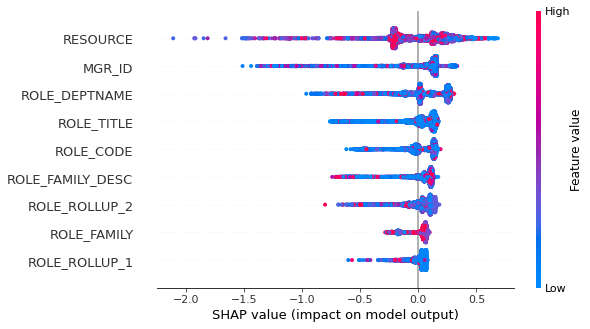

In [83]:
shap.summary_plot(shap_values, X_validation)

###dont look at the colors if ct features, just look at the shape###
#catboost also has object importance & eval features

# Snapshotting


In [88]:
#uncoment to use, then recoment to resume
#!rm 'catboost_info/snapshot.bkp'

model = CatBoostClassifier(
    #eval_metric='AUC',
    iterations=100,
    #learning_rate=0.5,
    #early_stopping_rounds=20,
    #use_best_model=False,
    snapshot_file='snapshot.bkp',
    snapshot_interval=1
)

model.fit(train_pool, eval_set=validation_pool, verbose=10)

rm: catboost_info/snapshot.bkp: No such file or directory
Learning rate set to 0.193326
0:	learn: 0.5566769	test: 0.5563281	best: 0.5563281 (0)	total: 10.6ms	remaining: 1.05s
10:	learn: 0.2178466	test: 0.2133204	best: 0.2133204 (10)	total: 91.2ms	remaining: 738ms
20:	learn: 0.1814093	test: 0.1725174	best: 0.1725174 (20)	total: 163ms	remaining: 613ms
30:	learn: 0.1747026	test: 0.1623252	best: 0.1623252 (30)	total: 244ms	remaining: 543ms
40:	learn: 0.1730095	test: 0.1605745	best: 0.1605745 (40)	total: 321ms	remaining: 461ms
50:	learn: 0.1712531	test: 0.1592140	best: 0.1592140 (50)	total: 398ms	remaining: 382ms
60:	learn: 0.1699903	test: 0.1583589	best: 0.1583589 (60)	total: 475ms	remaining: 304ms
70:	learn: 0.1696087	test: 0.1582369	best: 0.1582042 (66)	total: 552ms	remaining: 225ms
80:	learn: 0.1681471	test: 0.1573081	best: 0.1573081 (80)	total: 624ms	remaining: 146ms
90:	learn: 0.1673316	test: 0.1575898	best: 0.1573067 (81)	total: 707ms	remaining: 70ms
99:	learn: 0.1668035	test: 0.1574

# Saving the model


In [89]:
model = CatBoostClassifier(
    #eval_metric='AUC',
    iterations=10,
    #learning_rate=0.5,
    #early_stopping_rounds=20,
    #use_best_model=False,
    #snapshot_file='snapshot.bkp',
    #snapshot_interval=1
)

model.fit(train_pool, eval_set=validation_pool, verbose=False)
model.save_model('catboost_model.bin')
model.save_model('catboost_model.json', format='json')

In [91]:
model.load_model('catboost_model.bin')
print(model.get_params())
print(model.learning_rate_)

{'iterations': 10, 'loss_function': 'Logloss', 'verbose': 0}
0.5


# Hyperperam Tuning

## Threre are also params to speed up the training and for large datasets - might be useful to me

In [96]:
tuned_model = CatBoostClassifier(
    #eval_metric='AUC',
    iterations=1000,
    learning_rate=0.03, 
    depth=6, #in some cases try 10 then adjust from there - don't go above
    l2_leaf_reg=3,
    random_strength=1,
    bagging_temperature=1
    #early_stopping_rounds=20,
    #use_best_model=False,
    #snapshot_file='snapshot.bkp',
    #snapshot_interval=1
)

tuned_model.fit(
    X_train, y_train, cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot = True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))